In [3]:
#Setting working directory
import os
# path = 'E:\\PYTHON\\jupyternotebook'
path = 'E:\\PYTHON\\prediction_interval'
os.chdir(path)
print(os.getcwd())

E:\PYTHON\prediction_interval


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
x = 20 * np.random.randn(1000) + 100
y = x + (10* np.random.randn(1000)+50)

In [5]:
print('x : mean = %.3f std = %.3f' % (np.mean(x), np.std(x)))
print('y : mean = %.3f std = %.3f' % (np.mean(y), np.std(y)))

x : mean = 99.378 std = 20.524
y : mean = 148.959 std = 22.782


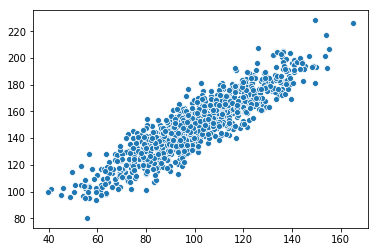

In [6]:
sns.scatterplot(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


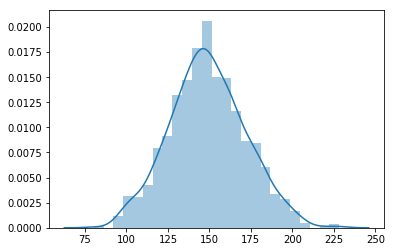

In [7]:
sns.distplot(y)

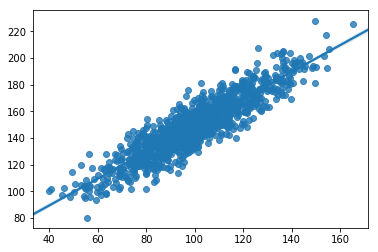

In [8]:
sns.regplot(x,y)

In [9]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [10]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
x

array([[123.56128565],
       [ 87.32582238],
       [ 63.44794788],
       [109.74600307],
       [ 95.08625934],
       [137.33158758],
       [ 71.09942839],
       [129.40465766],
       [103.32448873],
       [ 72.14372538],
       [103.37324003],
       [115.98971685],
       [ 96.00758104],
       [101.466218  ],
       [ 81.88540666],
       [ 98.70979257],
       [ 99.78045276],
       [ 95.5993652 ],
       [100.16711704],
       [114.04180793],
       [124.21893794],
       [109.75920299],
       [ 82.14445884],
       [ 93.44086336],
       [ 77.98678736],
       [104.87984646],
       [ 98.06248012],
       [111.46675739],
       [118.57398135],
       [103.76584752],
       [ 75.23548988],
       [ 72.8467046 ],
       [ 91.58013059],
       [ 77.52018091],
       [100.74931929],
       [105.06760378],
       [ 94.08684737],
       [ 80.32264837],
       [120.24512232],
       [ 96.94555624],
       [113.74955926],
       [ 79.56190086],
       [127.40392226],
       [106

In [12]:
lr.score(x,y)

0.8174601174142335

In [18]:
y_pred = lr.predict(x)


In [20]:
sum_errs = ((y - y_pred)**2).sum()
stdev = np.sqrt(sum_errs/ (len(y)-2))
stdev

9.743204950011295

In [21]:
interval = 1.96*stdev
interval

19.09668170202214

In [22]:
x_actual = x[0]
y_actual = y[0]
y_predicted = y_pred[0]
y_predicted

array([173.22936505])

In [23]:
lr.intercept_ + x_actual*lr.coef_

array([[173.22936505]])

In [26]:
print("Lower is ",y_predicted - interval)
print("True predicted value is ", y_predicted)
print("Upper is ",y_predicted + interval)


Lower is  [154.13268335]
True predicted value is  [173.22936505]
Upper is  [192.32604675]


In [25]:
print("Actual value is ", y_actual)

Actual value is  [173.01751417]


In [41]:
print("95% chance of interval gives us the lower bound as",y_predicted - interval, "and", "Upper bound as ",y_predicted + interval )

95% chance of interval gives us the lower bound as [154.13268335] and Upper bound as  [192.32604675]


In [31]:
import statsmodels.api as sm
x_sm = sm.add_constant(x)
results = sm.OLS(y,x_sm).fit()


In [33]:
results.params

array([49.22507056,  1.00358534])

In [34]:
print(lr.intercept_,lr.coef_)

[49.22507056] [[1.00358534]]


In [35]:
x_actual = x_sm[0]
y_actual = y[0]
y_sm_predicted =results.predict(x_sm[0])
print(y_predicted)
print(y_sm_predicted)

[173.22936505]
[173.22936505]


In [36]:
sm_prediction=results.get_prediction(x_sm[0])


In [38]:
sm_prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,173.229365,0.47616,172.294976,174.163754,154.087028,192.371702
